In [1]:
from stardist_model import *
from cross_validation_stardist import * 

In [2]:
CROSS_VALIDATION = False
VISUALISATION = False
VISUALISATION_RESULTS = True
PICTURES = True

In [3]:
if CROSS_VALIDATION:
    cross_validate("MIP", "", [125], [0.003,0.002], [40])
    cross_validate("MIP_FOCUS", "", [125], [0.003,0.002], [40])
    cross_validate("FINETUNE", "", [125], [0.003,0.002], [40])

In [4]:
from visualisation_stardist import *

if VISUALISATION:
    visualisation("results_/", "MIP")
    visualisation("results_/", "MIPFOCUS")
    visualisation("results_/", "FINETUNED")

In [5]:
from visualisation_stardist import *

if VISUALISATION_RESULTS:
    visualisation("results/", "MIP")
    visualisation("results/", "MIPFOCUS")
    visualisation("results/", "FINETUNED")

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.451346, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
Non Maximum Suppression (2D) ++++ 
keeping 2012/24064 polyhedra
NMS took 0.1811 s
NMS: n_polys    = 24064 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1
NMS: building kdtree...
NMS: starting suppression loop
|#############################################     | [91 % suppressed]
NMS: Suppressed polygons:      22052 / 24064  (91.64 %)
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.453419, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
keeping 1867/20817 polyhedra
NMS took 0.1578 s
Non Maximum Suppression (2D) ++++ 
NMS: n_polys    = 20817 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: u

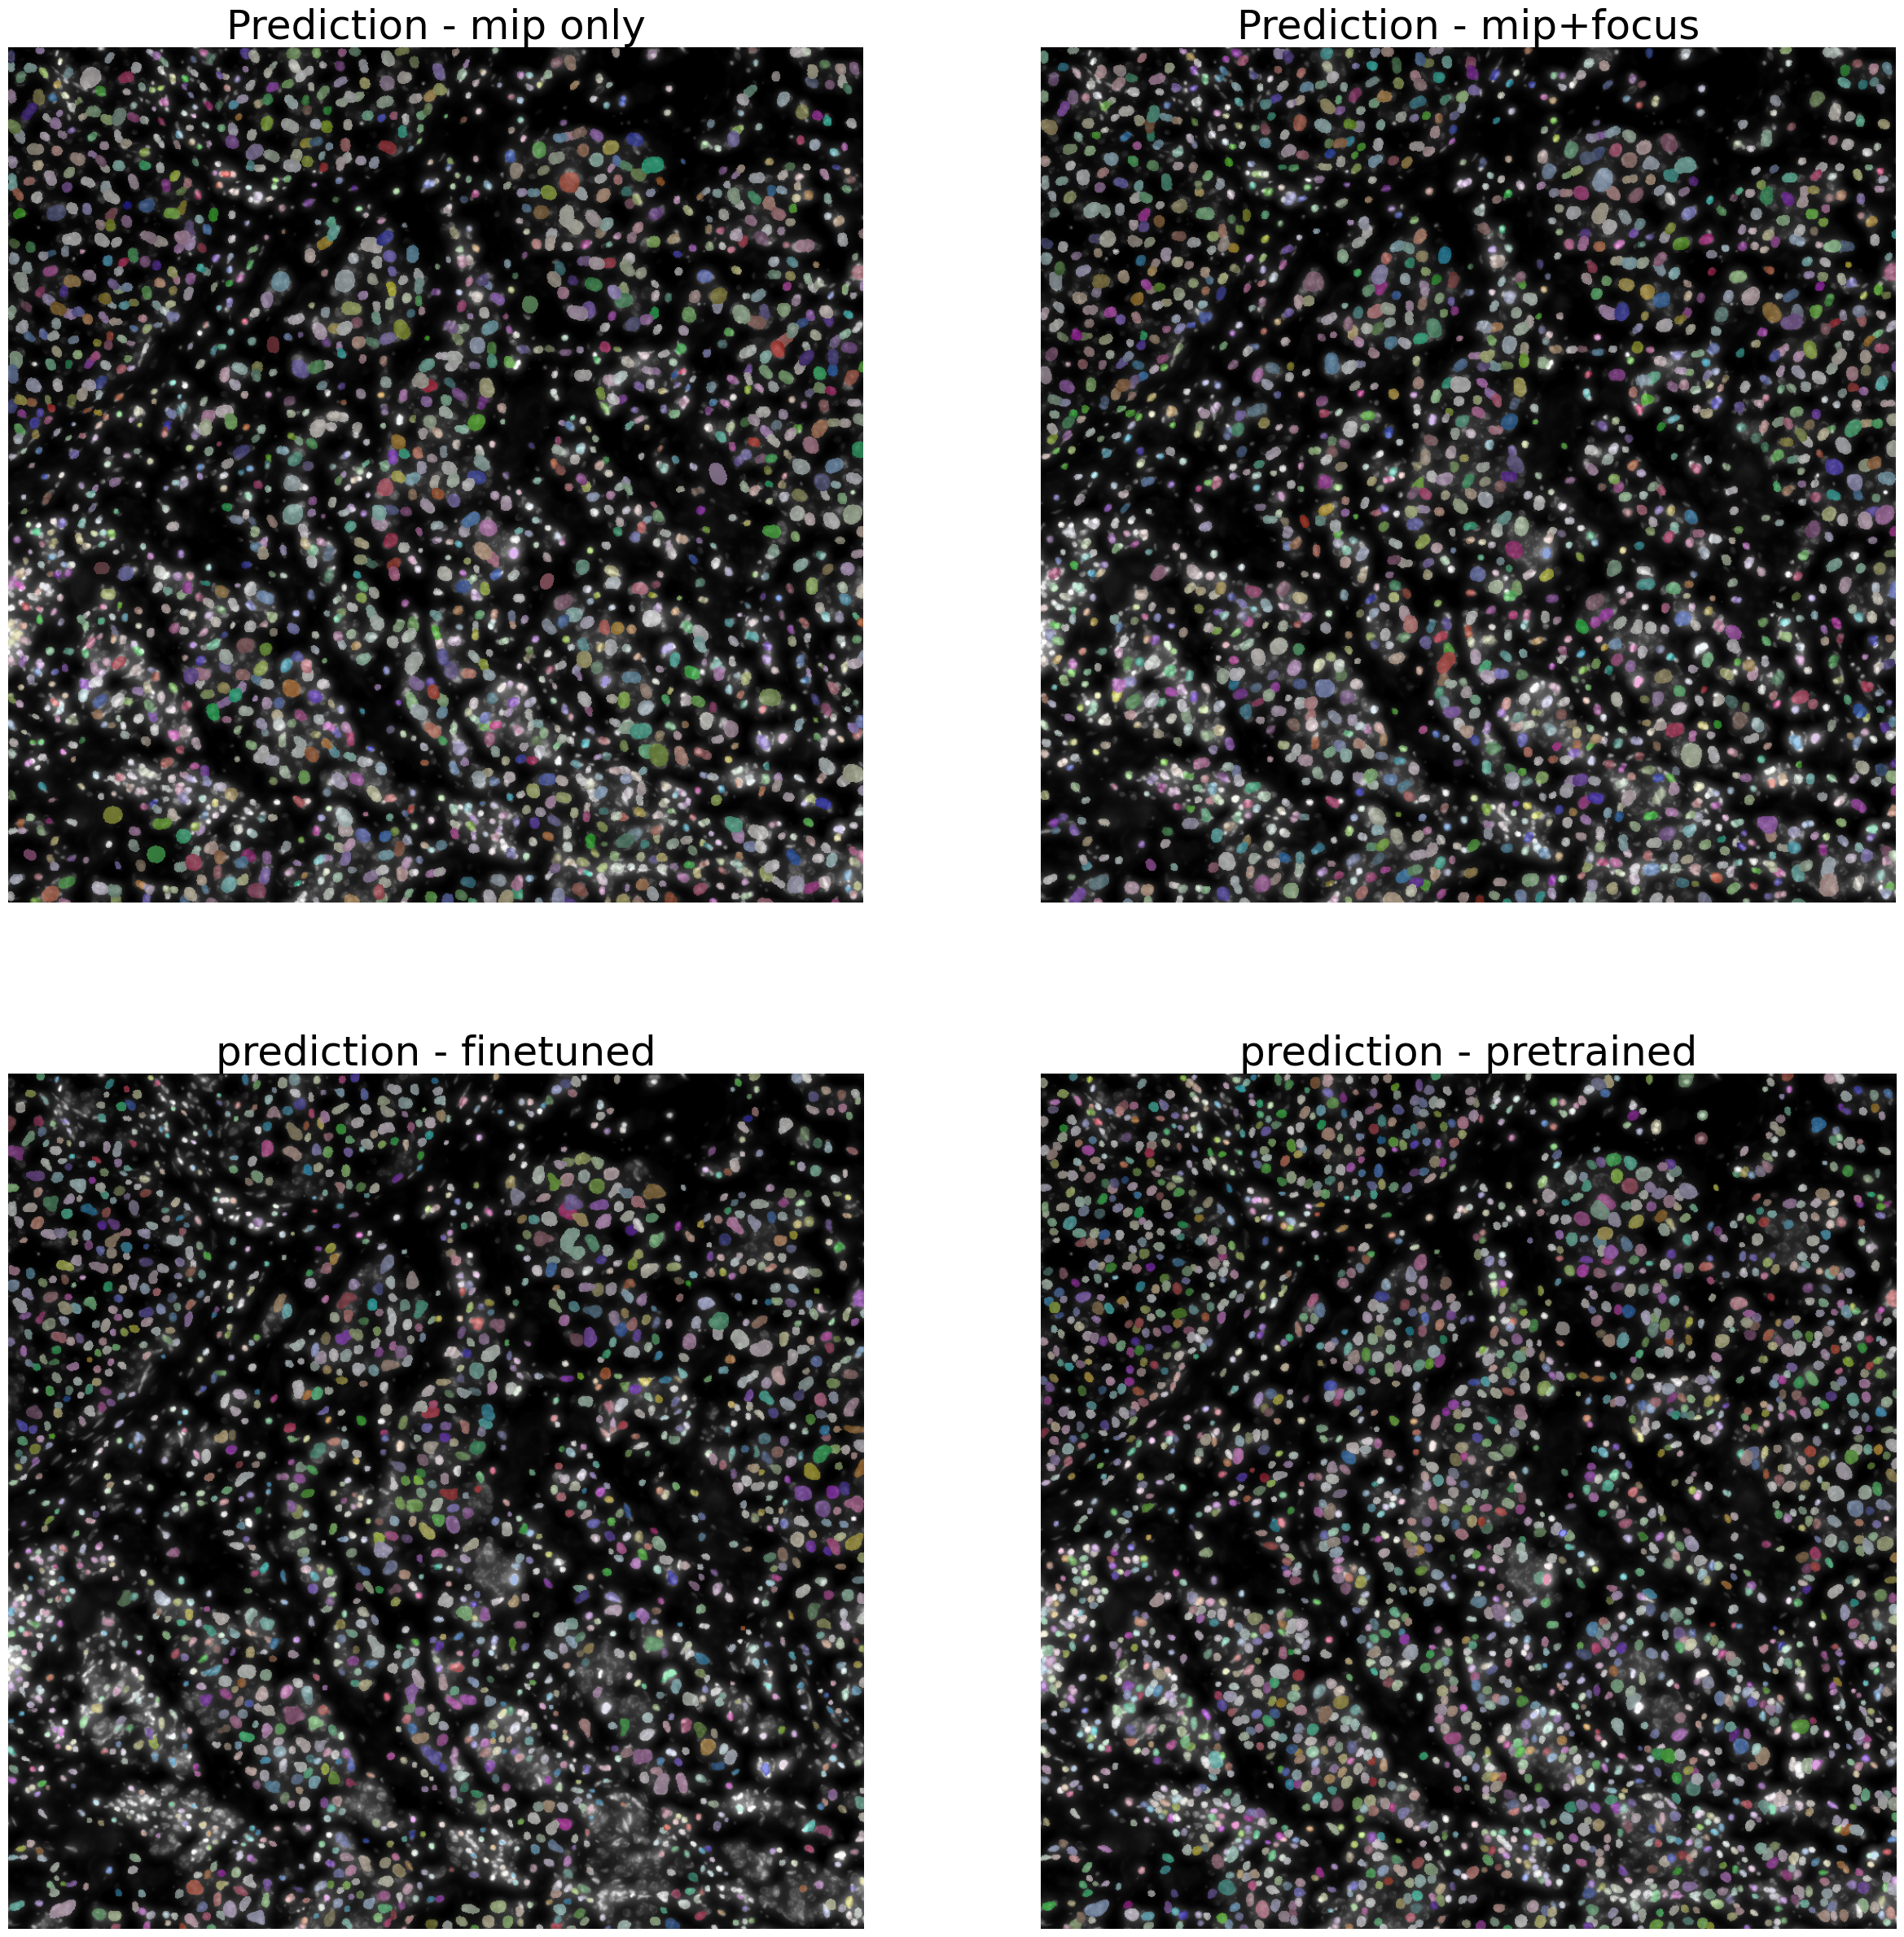

In [7]:
if PICTURES:
    import matplotlib.pyplot as plt

    from tifffile import imread
    from csbdeep.utils import normalize

    from stardist.models import StarDist2D
    
    X = ["models/mip-reduced.tif"]
    X = list(map(imread,X))

    axis_norm = (0,1)
    my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
    my_img_norm =my_img_norm[1000:2000,1000:2000]
    axis_norm = (0,1)

    mip_model_predict = StarDist2D(None, name="mip", basedir="results/models")
    plt.rcParams.update({'font.size': 30})

    segmented_img, details_img = mip_model_predict.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)

    plt.subplot(2,2,1)
    plt.imshow(render_label(normalize(segmented_img), img=my_img_norm))
    plt.axis("off")
    plt.title("Prediction - mip only")


    mipfocus_model_predict = StarDist2D(None, name="mipfocus", basedir="results/models")

    segmented_img_mipfocus, details_img1 = mipfocus_model_predict.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)
    plt.subplot(2,2,2)
    plt.imshow(render_label(normalize(segmented_img_mipfocus), img=my_img_norm))
    plt.axis("off")
    plt.title("Prediction - mip+focus")


    finetuned_model_predict = StarDist2D(None, name="finetuned", basedir="results/models")

    segmented_img_finetuned, details_img2 = finetuned_model_predict.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)


    plt.subplot(2,2,3)
    plt.imshow(render_label(normalize(segmented_img_finetuned), img=my_img_norm))
    plt.axis("off")
    plt.title("prediction - finetuned")


    StarDist2D.from_pretrained()
    model2 = StarDist2D.from_pretrained('2D_versatile_fluo')

    segmented_img_pre, details_img3 = model2.predict_instances(my_img_norm, verbose=True)
    plt.rcParams["figure.figsize"] = (30,30)

    plt.subplot(2,2,4)
    plt.imshow(render_label(normalize(segmented_img_pre), img=my_img_norm))
    plt.axis("off")
    plt.title("prediction - pretrained")

    print(len(details_img["points"]),len(details_img1["points"]),len(details_img2["points"]),len(details_img3["points"]))


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.476619, nms_thresh=0.3.
predicting instances with nms_thresh = 0.3
non-maximum suppression...
keeping 1692/30432 polyhedraNon Maximum Suppression (2D) ++++ 
NMS: n_polys    = 30432 
NMS: n_rays     = 32  
NMS: thresh     = 0.300 
NMS: use_bbox   = 1
NMS: use_kdtree = 1

NMS: building kdtree...
NMS: starting suppression loop
|###########################################       | [88 % sNMS took 0.2426 s
|##############################################    | [94 % suppressed]
NMS: Suppressed polygons:      28740 / 30432  (94.44 %)
1692


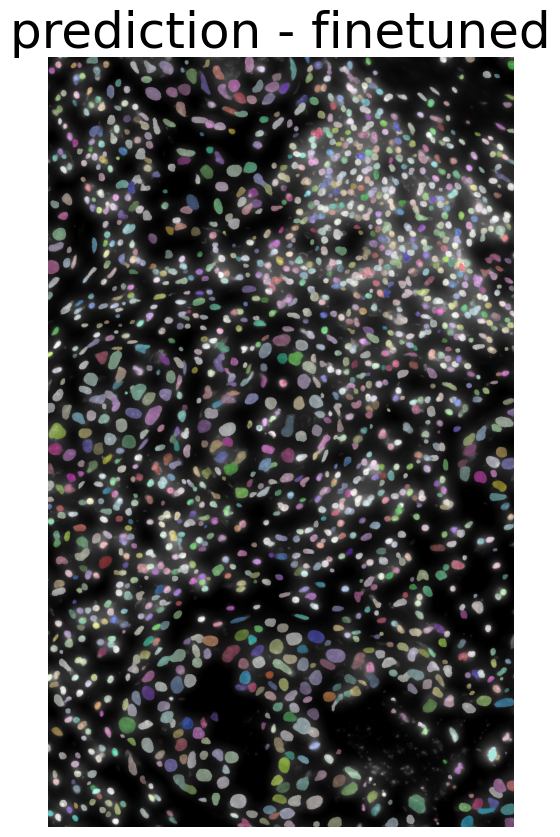

In [9]:
import matplotlib.pyplot as plt

from tifffile import imread
from csbdeep.utils import normalize

from stardist.models import StarDist2D

X = ["inputs/mip_2.tif"]
X = list(map(imread,X))

axis_norm = (0,1)
my_img_norm = normalize(X[0], 1,99.8, axis=axis_norm)
my_img_norm =my_img_norm
axis_norm = (0,1)


finetuned_model_predict = StarDist2D(None, name="finetuned", basedir="results/models")

segmented_img_finetuned, details_img2 = finetuned_model_predict.predict_instances(my_img_norm, verbose=True)
plt.rcParams["figure.figsize"] = (15,10)


plt.imshow(render_label(normalize(segmented_img_finetuned), img=my_img_norm))
plt.axis("off")
plt.title("prediction - finetuned")
print(len(details_img2["points"]))